In [18]:
%reload_ext autoreload
%autoreload 2

In [19]:
import os, sys
import pandas as pd

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [14]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [15]:
from src.loader import NewsDataLoader
import src.utils as utils
if __name__ == "__main__":
    data_directory = "../data"
    loader = NewsDataLoader(data_directory)

# Drop duplicates
rating_df.drop_duplicates(inplace=True)
domain_locations_df.drop_duplicates(inplace=True)
traffic_data_df.drop_duplicates(inplace=True)

# Drop unnecessary columns
if 'source_id' in rating_df.columns:
    rating_df.drop(columns=['source_id'], inplace=True)

if 'url_to_image' in rating_df.columns:
    rating_df.drop(columns=['url_to_image'], inplace=True)

# Drop rows with missing values
rating_df = rating_df.dropna(axis=0)
domain_locations_df = domain_locations_df.dropna(axis=0)

# rating_df['domain'] = rating_df['url'].apply(get_domain)

merge_df=pd.merge(rating_df, domain_locations_df ,left_on='source_name', right_on ='SourceCommonName' ,how ='left')
merge_df=pd.merge(merge_df, traffic_data_df , left_on ='source_name' ,right_on='Domain' ,how ='left')

ModuleNotFoundError: No module named 'loader'

In [ ]:
#  Top and Bottom 10 Websites
top_10_websites = merge_df['source_name'].value_counts().head(10)
bottom_10_websites = merge_df['source_name'].value_counts().tail(10)

print("Top 10 Websites are:\n", top_10_websites)
print("\nBottom 10 Websites are:\n", bottom_10_websites)

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot for top 10 websites
plt.subplot(1, 2, 1)
top_10_websites.plot(kind='bar', color='skyblue')
plt.title('Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

# Plot for bottom 10 websites
plt.subplot(1, 2, 2)
bottom_10_websites.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Websites with Smallest Count of News Articles')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Websites with the Highest Numbers of Visitors Traffic

websites_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)
print(merge_df.GlobalRank)
print("\nWebsites with Highest Numbers of Visitors Traffic:\n", websites_traffic)

In [ ]:
#  Countries with the Highest Number of News Media Organisations
countries_media_organizations = merge_df['Country'].value_counts()
print("\nCountries with the Highest Number of News Media Organisations:")
print(countries_media_organizations)


In [ ]:
# Countries that have many articles written about them
articles_about_countries = merge_df['Country'].value_counts()
print("\nCountries that have many articles written about them:", articles_about_countries)


In [ ]:

#  Websites that reported about specific countries or regions
countries_of_interest = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']
websites_reporting_about_countries = merge_df[merge_df['Country'].isin(countries_of_interest)]

print("\nWebsites that reported about specific countries or regions:", websites_reporting_about_countries)


In [ ]:

#Websites with the highest count of positive, neutral, and negative sentiment
sentiment_counts_by_website = merge_df.groupby('source_name')['title_sentiment'].value_counts()
print("\nWebsites with the highest count of positive, neutral, and negative sentiment:", sentiment_counts_by_website)


In [ ]:
# Compare the impact of using mean/average and median

merge_df['title_sentiment'] = pd.to_numeric(merge_df['title_sentiment'], errors='coerce')

impact_mean_average_median = merge_df[['title_sentiment']].agg(['mean', 'median'])

print("\nImpact of using mean/average and median sentiment:", impact_mean_average_median)


In [ ]:

# Check the distribution of sentiments for a particular domain
top_10_domains_by_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)
sentiment_distribution_for_domain = merge_df[merge_df['source_name'].isin(top_10_domains_by_traffic.index)]['title_sentiment'].value_counts()

print("Sentiment distribution for a particular domain:")
print(sentiment_distribution_for_domain)

In [ ]:
if not sentiment_distribution_for_domain.empty:

    plt.figure(figsize=(8, 6))
    sentiment_distribution_for_domain.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Sentiments for a Particular Domain')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Sentiment distribution data is empty. Unable to plot.")

In [ ]:
# Compare content metadata across sites
content_metadata_comparison = merge_df.groupby('source_name')[['author', 'category']].nunique()
print("\nComparison of content metadata across sites:", content_metadata_comparison)


In [ ]:
plt.figure(figsize=(10, 6))
content_metadata_comparison.plot(kind='bar')
plt.title('Comparison of Content Metadata Across Sites')
plt.xlabel('Website')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Unique Authors', 'Unique Categories'])
plt.tight_layout()
plt.show()

In [ ]:
# Analyze the similarity of message lengths across sites
message_lengths = merge_df.groupby('source_name')['content'].apply(lambda x: x.str.len().mean())
print("\nAnalysis of the similarity of message lengths across sites:", message_lengths)

In [ ]:
plt.figure(figsize=(10, 6))







.plot(kind='bar', color='skyblue')
plt.title('Analysis of Message Lengths Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Message Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze the similarity of the number of words in titles across sites
title_word_counts = merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len().mean())
print("\nAnalysis of the similarity of the number of words in titles across sites:", title_word_counts)


In [ ]:
plt.figure(figsize=(10, 6))
title_word_counts.plot(kind='bar', color='salmon')
plt.title('Analysis of Title Word Counts Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Number of Words in Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the average number of words in titles
title_word_counts.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Words in Titles Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Number of Words')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:

# Compare content metadata across sites
plt.figure(figsize=(10, 6))
content_metadata_comparison.plot(kind='bar', stacked=True)
plt.title('Comparison of Content Metadata Across Sites')
plt.xlabel('Website')
plt.ylabel('Number of Unique Items')
plt.xticks(rotation=45, ha='right')
plt.legend(['Authors', 'Categories'])
plt.tight_layout()
plt.show()


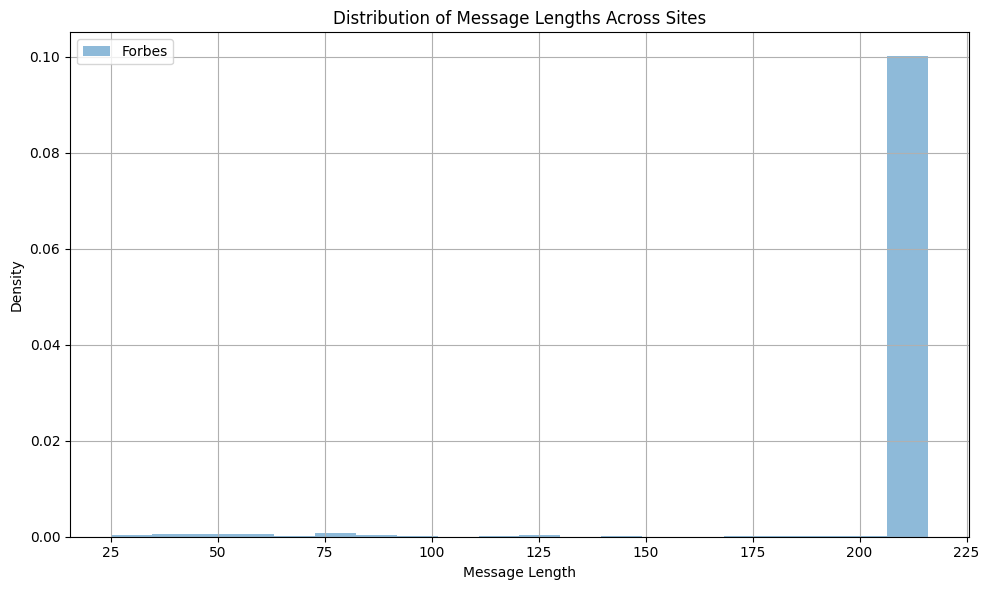

In [41]:
# Similarity of raw message lengths across sites
plt.figure(figsize=(10, 6))
merge_df.groupby('source_name')['content'].apply(lambda x: x.str.len()).hist(alpha=0.5, bins=20, density=True)
plt.title('Distribution of Message Lengths Across Sites')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend(merge_df['source_name'].unique())
plt.tight_layout()
plt.show()

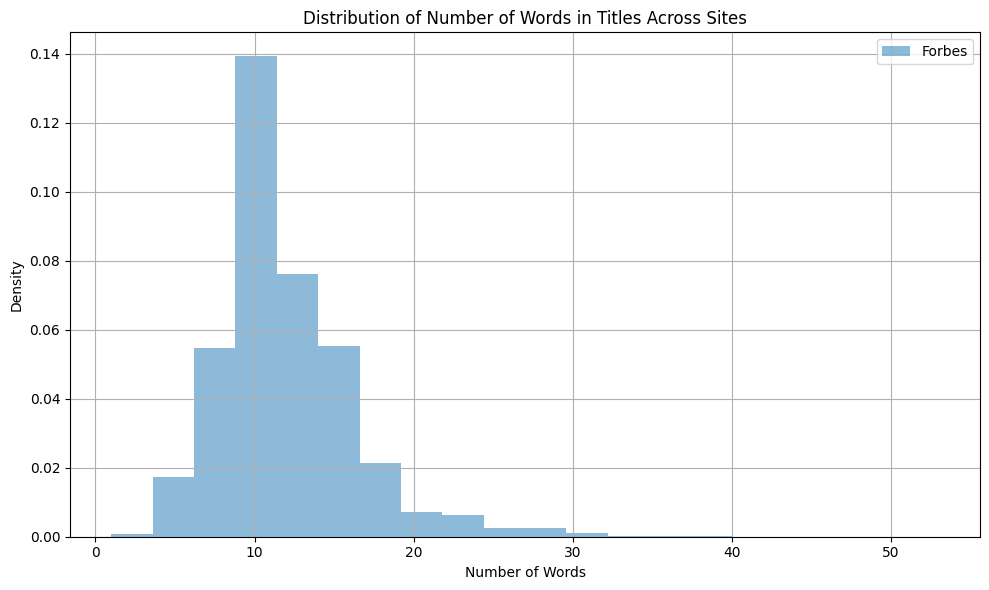

In [42]:

# Similarity of number of words in titles across sites
plt.figure(figsize=(10, 6))
merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len()).hist(alpha=0.5, bins=20, density=True)
plt.title('Distribution of Number of Words in Titles Across Sites')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend(merge_df['source_name'].unique())
plt.tight_layout()
plt.show()